# Problem Set #3, due February 24th at 11:59 pm

This problem set includes four sections that will be a mixture of methods, a mixture of data and a mixture of learning objectives. You will have nearly two weeks to complete this, but I highly recommend getting started early. We will be working through parts of this assignment in class so you will benefit most from this if you are keeping up with the assignment.   

The learning objectives, in no particular order, for this assignment are the following:

- Explore two well-known unsupervised ML methods
- Work with a text-rich data set 
- Apply Naive Bayes with varying feature selection decisions
- Convert ML code from one language to another
- Find a real data set to apply a known ML method to
- Recognize methodological limitations and potential ethical concerns when using data from the real-world


## Section 1: Code Conversion (10 pts)

Often in data science, we need to convert code from one language to another. This could be for several reasons. You may work for a company that only uses python. You may have code written for the data cleaning in one language, and the ML part written in another language. To simplify things, you bring them together. You may want to double check your results and make sure there is no bug in the code or in your logic. So, you write the algorithm in multiple languages. We do this a lot in my lab. In fact, we are doing it right now for a project. If you get the same answer in multiple languages, you are more confident that you don't have a bug. 

You will also find a real data set to test your code (question 2). This can be any data set that you find on the web.

1. For this section of PS3, you will essentially mimic the the lab we that did in class on k-Means Clustering and Hierarchical. You will convert it from R to python. Make sure to create an elbow plot for the k-Means section and to compare the k-means results to the hierarchical clustering results for your synthetic data, using various k-values. (4 pts)

2. For the next part of this section, use your new python code and run it on a real data set. This can be any data set that you find on the web. Explain the data set you chose and one hypothesis of what clustering is telling you about your data. (4 pts)

3. What limitations do you see with these two methods? (2 pts) 


# Q1. Converting R code to Python

In [225]:
# Put your code and answers here

# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import seaborn as sns

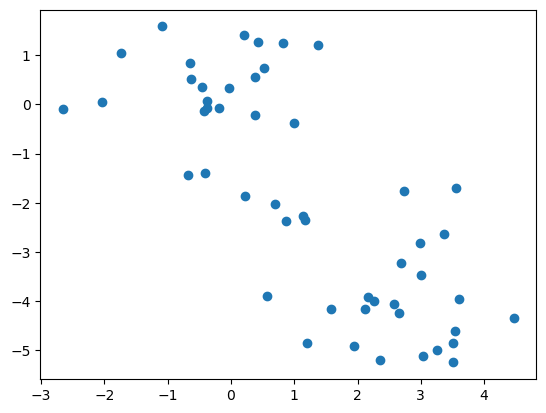

In [226]:
# Creating Synthetic data and plotting it

np.random.seed(2)
x = np.random.normal(size = (50,2))
x[:25,0] += 3
x[:25,1] -= 4

plt.scatter(x[:,0], x[:,1])
plt.show()

In [227]:
# Performing K-means clustering 

km = KMeans(n_clusters=2, n_init=20)
km.fit(x)
cluster_labels = km.labels_
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]


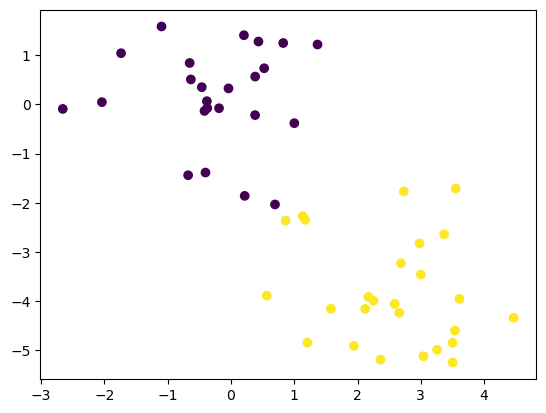

In [228]:
# Plotting the data after clustering 

plt.scatter(x[:,0], x[:,1], c=km.labels_)

/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_11299/3883809021.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'tot_withinss': km1.inertia_}, ignore_index=True)
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_11299/3883809021.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'tot_withinss': km1.inertia_}, ignore_index=True)
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_11299/3883809021.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'tot_withinss': km1.inertia_}, ignore_index=True)
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_11299/3883809021.py:7: FutureWarning: The frame.append method is dep

Text(0, 0.5, 'Withinss')

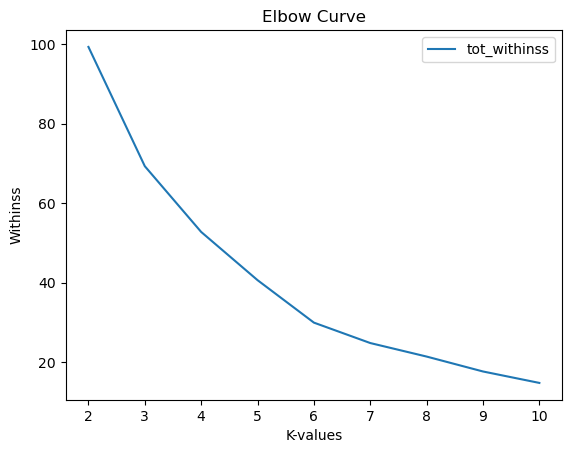

In [229]:
# Performing k-means for different k values and plotting the 'elbow curve'

df = pd.DataFrame(columns=['k', 'tot_withinss'])
for k in range(2, 11):
    km1 = KMeans(n_clusters=k, n_init=20)
    km1.fit(x)
    df = df.append({'k': k, 'tot_withinss': km1.inertia_}, ignore_index=True)
df.plot(x='k', y='tot_withinss', kind='line')
plt.title('Elbow Curve')
plt.xlabel('K-values')
plt.ylabel('Withinss')

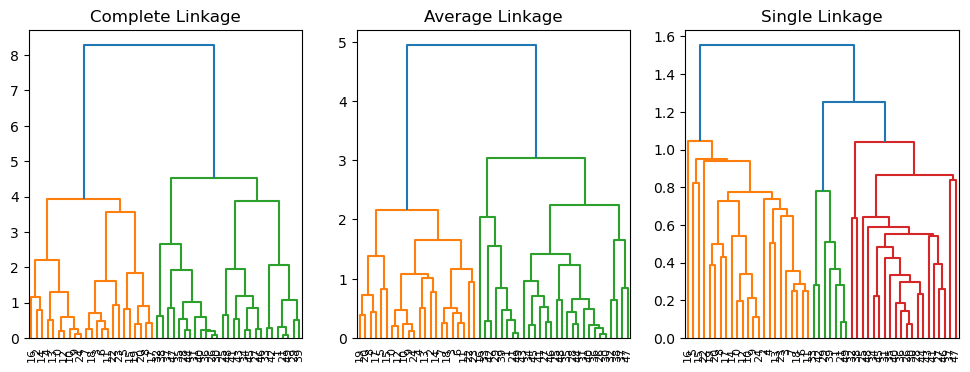

In [230]:
# Perform hierarchical clustering using complete, average, and single linkage

hc_complete = linkage(x, method='complete')
hc_average = linkage(x, method='average')
hc_single = linkage(x, method='single')

# Plot dendrograms for each type of linkage

plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
dendrogram(hc_complete)
plt.title('Complete Linkage')

plt.subplot(1,3,2)
dendrogram(hc_average)
plt.title('Average Linkage')

plt.subplot(1,3,3)
dendrogram(hc_single)
plt.title('Single Linkage')

plt.show()


In [231]:
# Compare hierarchical clustering with k-means

labels_complete = cut_tree(hc_complete, n_clusters=[2]).T
labels_average = cut_tree(hc_average, n_clusters=[2]).T
labels_single = cut_tree(hc_single, n_clusters=[2]).T

print(cluster_labels)

print(labels_complete)
print(labels_average)
print(labels_single)


print((cluster_labels == np.array(cut_tree(hc_complete, 2)).T).all())
print((cluster_labels == np.array(cut_tree(hc_average, 2)).T).all())
print((cluster_labels == np.array(cut_tree(hc_single, 2)).T).all())

#print(km.labels_ == np.array(labels_complete))
#print(km.labels_ == np.array(labels_average))
#print(km.labels_ == np.array(labels_single))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
False
False
False


# Q2. Performing K-means clustering and Hierarchical clustering on a real dataset

For this task, I have chosen the weight-height dataset that can be found here: https://www.kaggle.com/datasets/mustafaali96/weight-height

I have chosen this dataset because height and weights are assumed to be correlated. One hypothesis that can be derived from the chart is that one group of people have taller and heavier than the other group. Considering that this dataset was collected for Male and Female genders, we can assume that the orange clusters are representing the data of males and te blue group is representing the data of females.

In [232]:
# Loading dataset

test_data = pd.read_excel(r'/Users/poojasadarangani/Downloads/SP22 Weight_Height.xlsx')

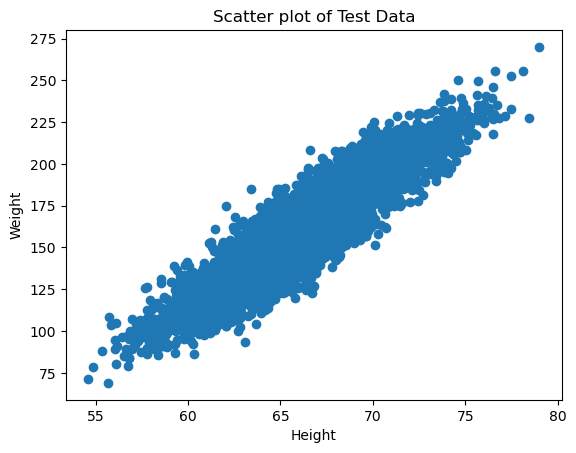

In [233]:
# Plotting dataset

plt.scatter(test_data['Height'], test_data['Weight'])
plt.title("Scatter plot of Test Data")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

# Dropping irrelevant column(s) from the dataset

y=test_data.drop(['Gender'], axis=1)

In [234]:
# K-means clustering 

km = KMeans(n_clusters=2, n_init=20)
km.fit(y)
test_data['cluster_labels'] = km.labels_
cluster_labels2 = km.labels_
print(cluster_labels2)

[1 1 1 ... 0 0 0]


/Users/poojasadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


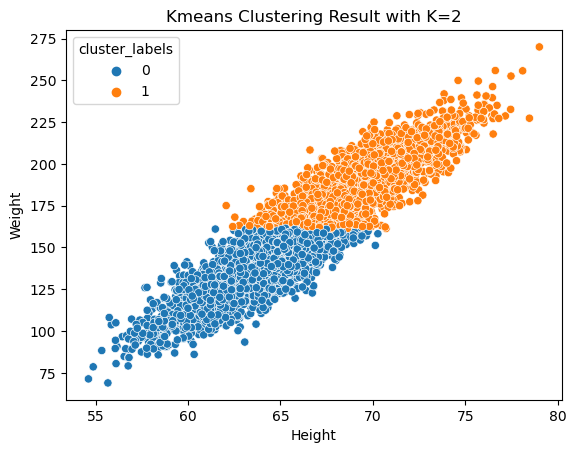

In [235]:
# Plotting dataset after clustering

sns.scatterplot('Height', 'Weight', data=test_data, hue='cluster_labels')
plt.title('Kmeans Clustering Result with K=2')
plt.show()

In [278]:
# 
df = pd.DataFrame(columns=['k', 'tot_withinss'])
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=20)
    km.fit(y)
    df = df.append({'k': k, 'tot_withinss': km.inertia_}, ignore_index=True)
df.plot(x='k', y='tot_withinss', kind='line')
plt.title('Elbow Curve')
plt.xlabel('K-values')
plt.ylabel('Withinss')

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

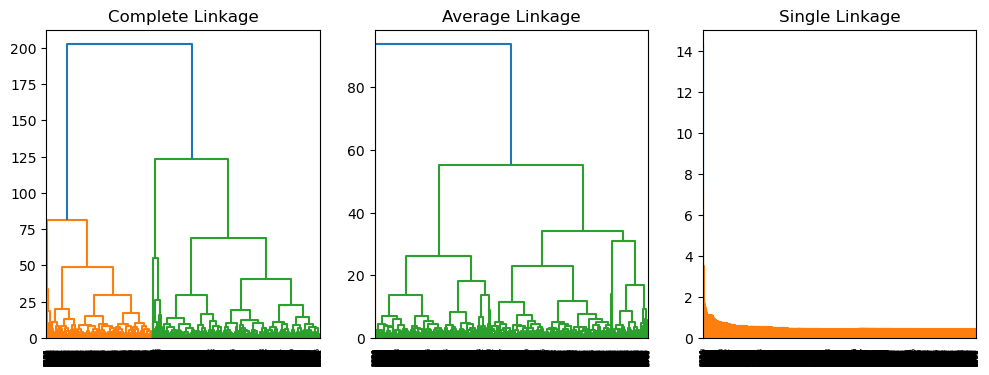

In [237]:
# Perform hierarchical clustering using complete, average, and single linkage

hc_complete = linkage(y, method='complete')
hc_average = linkage(y, method='average')
hc_single = linkage(y, method='single')

# Plot dendrograms for each type of linkage

plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
dendrogram(hc_complete)
plt.title('Complete Linkage')

plt.subplot(1,3,2)
dendrogram(hc_average)
plt.title('Average Linkage')

plt.subplot(1,3,3)
dendrogram(hc_single)
plt.title('Single Linkage')

plt.show()


In [238]:
# Compare hierarchical clustering with k-means

# Compare hierarchical clustering with k-means

labels_complete = cut_tree(hc_complete, n_clusters=[2]).T
labels_average = cut_tree(hc_average, n_clusters=[2]).T
labels_single = cut_tree(hc_single, n_clusters=[2]).T

print(cluster_labels2)

print(labels_complete)
print(labels_average)
print(labels_single)


print((cluster_labels2 == np.array(cut_tree(hc_complete, 2)).T).all())
print((cluster_labels2 == np.array(cut_tree(hc_average, 2)).T).all())
print((cluster_labels2 == np.array(cut_tree(hc_single, 2)).T).all())


[1 1 1 ... 0 0 0]
[[0 0 0 ... 1 0 1]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
False
False
False


# Limitations of these two methods

Limitations of K-means clustering:
1. Sensitive to outliers
2. K-means clustering assumes that the underlying data distribution is linear, which may not necessarily be true in the real world.

Limitations of Hierarchical Clustering:
1. Comutationaly expensive
2. Sensitive to distance metrics. Choosing an inappropriate distance metric can lead to suboptimal clustering results or even misleading interpretations
    

## Section 2: Decision Trees (15 pts)

We have already covered decision trees in lecture, but we did not get a chance to see them in action. For this section, you will apply decision trees to a data set used to predict whether someone has diabetes. You will find the data set on canvas called diabetes_dataset.csv. The goal of this section is to work through the code provided, answer a few questions about the code, and then try out different methods for improving your predictions

But first, you will respond to an error from another data set commonly used in ML classes to teach about decision trees. The point totals for this section are the following.

- You will see an error code when loading the first data set. Address task 1 and think about why this error was given. (4 pts)

- Run the code provided and make sure it works. (1 pt)

- Answer the question listed below about key features? (2 pt)

- Visualize your decision tree. (3 pts)

- Improve upon your model. (5 pts)




#### Task 1 (15 points)

Try loading the Boston data set below. This is a well-known data set that has been used for years in ML classes. You will see an error when trying to load it. I want you to reflect on this error and do a little research on the web why this data set has been removed from sklearn. 

One article about the problem: https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8

(4 pts) a) Write 1-3 paragraphs explaining the problem (beyond what is given in the error code) and why the data set was removed. b) Reflect on the history at the time, the and how these biases may show up in modern data sets as well. c) Suggest one way that this could have been avoided.

a) The Boston dataset is a well-known dataset that provides data on numerous housing characteristics in the Boston region, such as crime rates, property taxes, and highway accessibility. The dataset, however, has been chastised for its lack of representativeness and possible biases. The Boston dataset has also been criticized for potentially perpetuating racial and socioeconomic prejudices. The dataset, for example, includes characteristics such as crime rates, which may be overrepresented in specific areas and neighborhoods of certain races. As a result, biased models might emerge that perpetuate existing racial biases against minorities. Due to this ethical issue, it was removed from the scikit-learn library.

b) The Boston dataset was compiled in the 1970s, when racial prejudice were prevalent in many regions of the country. This historical background most likely impacted how the data was gathered as well as the variables included in the dataset. The dataset, for example, contains variables such as crime rates, which may be impacted by biased policing methods and discriminatory regulations. Moreover, the sample was restricted to a single location and did not reflect the range of experiences and situations found in other areas or cities.

c) One way to avoid potential biases and limitations in datasets such as the Boston dataset is to prioritize diversity and representativeness in data collection and selection. This can involve using a broader range of data sources and sampling strategies to ensure that the dataset is not limited to a single region or context. Updation of dataset with time is also crucial to ensure that it is upto date. 

In [239]:
# Load the Boston data and pause to think about the problems with this common used data set

from sklearn.datasets import load_boston

'''DEPRECATED: load_boston is deprecated in 1.0 and will be removed in 1.2.

The Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.

The scikit-learn maintainers therefore strongly discourage the use of this dataset unless the purpose of the code is to study and educate about ethical issues in data science and machine learning.
'''

'DEPRECATED: load_boston is deprecated in 1.0 and will be removed in 1.2.\n\nThe Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.\n\nThe scikit-learn maintainers therefore strongly discourage the use of this dataset unless the purpose of the code is to study and educate about ethical issues in data science and machine learning.\n'

#### Apply decision trees to a different data set

We will use a subset of the diabetes data set provided by the UCI machine learning repository. The data set is available on canvas. Additional details about the data set can be found here:

https://archive.ics.uci.edu/ml/datasets/diabetes

Medical data can also be sensitive, with consequential outcomes for patients and research. Especially if there are inequities in the medical systems, access to healthcare, way of collecting data, and generalizing data from one population to another. These are important things to keep in mind when dealing with any dataset.



In [240]:
# Load the data set
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [241]:
# Select features
# Ideally we would select features in consultation with a domain expert. Since that is not always possible, there are methods for identifying the most relevant featuers. As a start, we will select all but the outcome variable.


x = df.drop(['Outcome'], axis=1)
y = df.Outcome

(2 pts) What features or feature do you think will be most predictive? What feature do you think will be at the root of your tree? 

Think about this before running your code. Then, come back to this question after running your code below and answer the questions. 

According to me, the features 'Insulin', 'Age', 'Glucose', and 'Blood Pressure' would be most predictive. The feature 'Glucose' will be at the root of the tree.

In [242]:
# Put your answer here

In [243]:
# Load libraries for applying decision trees

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


In [244]:
# Set up your training and test variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [245]:
# We need to evaluate our results. There are various metrics that can be used for this. 

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.57      0.56      0.57        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154

Accuracy: 69.48051948051948


array([[76, 23],
       [24, 31]])

#### Visualizing Decision Trees

One of the advantages of decision trees is that they are easier to interpret, especially when you can visualize them.

(3 pts) For your first coding task, find a way to visualize the decision tree that you created above. There are many different ways to do this. Explore the help files in sklearn or utilize resources on the web. 

In [1]:
# Put your answer here

feature_names = df.columns[:8]
target_names = df['Outcome']

fig = plt.figure(figsize=(25,20))
plottree = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=str(target_names),
                   filled=True, fontsize=12)



NameError: name 'df' is not defined

#### Improve upon your model

There are many ways to improve your model. For example, you could vary the maximum depth of your true, you could select a subset of the features, you could try out Random Forests or AdaBoost, etc. Try at least three different strategies and then compare your evaluation metrics to the original evaluation metrics above to each of the new things that you try.  

In [247]:
# put your answer here

#Method 1: Random Forests

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(x_train,y_train)

y_pred_rf = model_rf.predict(x_test)

In [248]:
# We need to evaluate our results. There are various metrics that can be used for this. 

print(classification_report(y_test,y_pred_rf))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf)*100)
confusion_matrix(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

Accuracy: 75.97402597402598


array([[84, 15],
       [22, 33]])

In [249]:
#Method 2: Adaboost

from sklearn.ensemble import AdaBoostClassifier
model_ab = AdaBoostClassifier(random_state=100)

model_ab.fit(x_train,y_train)

y_pred_ab = model_ab.predict(x_test)

In [250]:
# We need to evaluate our results. There are various metrics that can be used for this. 

print(classification_report(y_test,y_pred_ab))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ab)*100)
confusion_matrix(y_test,y_pred_ab)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        99
           1       0.73      0.67      0.70        55

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

Accuracy: 79.22077922077922


array([[85, 14],
       [18, 37]])

In [251]:
# Method 3: Feature selection

x1 = df.filter(['Insulin', 'Glucose','Age', 'BloodPressure'], axis=1)
x1.head(10)

,Insulin,Glucose,Age,BloodPressure
0,0,148,50,72
1,0,85,31,66
2,0,183,32,64
3,94,89,21,66
4,168,137,33,40
5,0,116,30,74
6,88,78,26,50
7,0,115,29,0
8,543,197,53,70
9,0,125,54,96


In [252]:
y1=y

# Set up your training and test variables

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model_selectedfeatures = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_selectedfeatures = model_selectedfeatures.fit(x1_train,y1_train)

#Predict the response for test dataset
y1_pred_selectedfeatures = model_selectedfeatures.predict(x1_test)

In [253]:
# We need to evaluate our results. There are various metrics that can be used for this. 

print(classification_report(y1_test,y1_pred_selectedfeatures))
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred_selectedfeatures)*100)
confusion_matrix(y1_test,y1_pred_selectedfeatures)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        99
           1       0.43      0.35      0.38        55

    accuracy                           0.60       154
   macro avg       0.55      0.55      0.55       154
weighted avg       0.59      0.60      0.59       154

Accuracy: 60.3896103896104


array([[74, 25],
       [36, 19]])

## Section 3: Fake News and Naive Bayes (20 pts)

For this section, you are going to apply Naive Bayes to a data set used in a recent [Kaggle competition](https://www.kaggle.com/competitions/fake-news/data). The goal of the competition is to build a classifer that could predict whether a news story is fake or true. 

I have provided the data sets on canvas. It includes three files: (1) a training data file with labels that includes an id, author, title, and text, (2) the test data set with the same features as the training data file except with no label, and a (3) sample file of your submission. 

You will receive points for the following tasks completed:

- Reading in the training data (2 pts)

- Extracting a set of features to include in your NB classifer. Justify your features in 2-3 sentences. (3 pts)

- Running the NB classifier (4 pts)

- Reporting your accuracy on the training data using cross validation (1 pt)

- Running your classifer on the test data set (2 pts).

- Answer the following question in 2-3 paragraphs (3 pts): how could you improve your accuracy? 

- Bonus point (1 pt): Implement one of your strategies above.

- Answering Discussion Questions (5 pts)




In [254]:
import re, string #import packages for regex replacement
from nltk.tokenize import TweetTokenizer # import tokenizer from nltk
import nltk # download the list of stopwords from nltk if you have not done this before
from nltk.corpus import stopwords # import stopwords
stopeng = set(stopwords.words('english')) #set language
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import *
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [255]:
# (2 pts) Read in your training data
train_df = pd.read_csv('train.csv', dtype='str')
train_df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


For the above problem, I think the most relevant features are author, title, and text. The author could be a good predictor because it is possible for a author (or source) to be known for publishing untrue stories. Additionally, Title and Text features could help the machine determine some commonly used words in the untrue stories. 

In [256]:
# (3 pts) Extract features

print(train_df.isnull().sum())
#train_df['title'].fillna('',inplace=True)
#train_df['author'].fillna('',inplace=True)
train_df = train_df.dropna(axis=0)
print(train_df.isnull().sum())

train_df = train_df[['title', 'author', 'label']]
train_df.head(10)

id           0
title      558
author    1957
text        39
label        0
dtype: int64
id        0
title     0
author    0
text      0
label     0
dtype: int64


,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,0
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,0
10,Obama’s Organizing for Action Partners with So...,Aaron Klein,0
11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,0


In [257]:
train_df_updated = pd.DataFrame()
train_df_updated['feature'] = train_df['title'] + " " + train_df['author']
train_df_updated['label'] = train_df['label']

train_df_updated.head(10)

,feature,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,0
7,Benoît Hamon Wins French Socialist Party’s Pre...,0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",0
10,Obama’s Organizing for Action Partners with So...,0
11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",0


In [258]:
# Define a function for removing punctuations and cleaning the data
def clean_text_round(row):
    row = row.lower()
    row = re.sub(r"[^\w\s]", '', row)
    row = re.sub('\'', '', row) #remove commas
    row = re.sub(',', '', row) #remove commas
    row = re.sub('\n', '', row) # remove carrot inserts from collection <---- new operation
    row = re.sub('-', '', row)
    row = re.sub('\?', '', row)
    row = re.sub('\.', '', row)
    row = re.sub('\'', '', row)
    row = re.sub('\"', '', row)
    row = re.sub('#', '', row)
    return row

clean = lambda x: clean_text_round(x)

In [259]:
# apply the function above across each row of the text column
train_df_updated.loc[:, 'feature'] = train_df_updated['feature'].apply(clean)
train_df_updated.head()

,feature,label
0,house dem aide we didnt even see comeys letter...,1
1,flynn hillary clinton big woman on campus bre...,0
2,why the truth might get you fired consortiumne...,1
3,15 civilians killed in single us airstrike hav...,1
4,iranian woman jailed for fictional unpublished...,1


In [260]:
# import tokenizer from nltk
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 

# define a function that we can apply over our data
def tweet_tokenize(row):
    row = tweet_tokenizer.tokenize(row)
    return row

tokenized = lambda x: tweet_tokenize(x)

In [261]:
train_df_updated.loc[:, 'feature'] = train_df_updated['feature'].apply(tokenized)
train_df_updated.head()

,feature,label
0,"[house, dem, aide, we, didnt, even, see, comey...",1
1,"[flynn, hillary, clinton, big, woman, on, camp...",0
2,"[why, the, truth, might, get, you, fired, cons...",1
3,"[15, civilians, killed, in, single, us, airstr...",1
4,"[iranian, woman, jailed, for, fictional, unpub...",1


In [262]:
import nltk
#nltk.download('stopwords') # download the list of stopwords from nltk if you have not done this before
from nltk.corpus import stopwords # import stopwords

stopeng = set(stopwords.words('english')) #set language

#define a function to remove stopwords
def remove_stopwords(row):
    row = [w for w in row if w not in stopeng]
    return row

no_stopwords = lambda x: remove_stopwords(x)

In [263]:
train_df_updated.loc[:, 'feature'] = train_df_updated['feature'].apply(no_stopwords)
train_df_updated.head()

,feature,label
0,"[house, dem, aide, didnt, even, see, comeys, l...",1
1,"[flynn, hillary, clinton, big, woman, campus, ...",0
2,"[truth, might, get, fired, consortiumnewscom]",1
3,"[15, civilians, killed, single, us, airstrike,...",1
4,"[iranian, woman, jailed, fictional, unpublishe...",1


In [264]:
#nltk.download('wordnet') # you may need to run these depending on your setup
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

# define function to lemmatize
def lemmatize(row):
    row = [lmtzr.lemmatize(token) for token in row]
    row = ' '.join(row) # this is the final step of our guided walkthrough, so I have re-joined the tweets into single documents instead of lists
    return row

lemmatized = lambda x: lemmatize(x)

In [265]:
#nltk.download('omw-1.4')
train_df_updated.loc[:, 'feature'] = train_df_updated['feature'].apply(lemmatized)
train_df_updated.head()

,feature,label
0,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitba...,0
2,truth might get fired consortiumnewscom,1
3,15 civilian killed single u airstrike identifi...,1
4,iranian woman jailed fictional unpublished sto...,1


In [266]:
from nltk.stem import *
from nltk.stem.porter import *

stemmer = PorterStemmer()

def stemming(row):
    row = row.split()
    row = [stemmer.stem(token) for token in row]
    row = ' '.join(row) # this is the final step of our guided walkthrough, so I have re-joined the tweets into single documents instead of lists
    return row

stemmed = lambda x: stemming(x)

In [267]:
train_df_updated.loc[:, 'feature'] = train_df_updated['feature'].apply(stemmed)
train_df_updated.head()

,feature,label
0,hous dem aid didnt even see comey letter jason...,1
1,flynn hillari clinton big woman campu breitbar...,0
2,truth might get fire consortiumnewscom,1
3,15 civilian kill singl u airstrik identifi jes...,1
4,iranian woman jail fiction unpublish stori wom...,1


In [268]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Import train_test_split function

# Create a CountVectorizer object to extract features from the text data
vectorizer = CountVectorizer()

# Extract features from the text data and the labels
X_train = train_df_updated['feature'].values
y_train = train_df_updated['label'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
#print(y_test.shape)

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

print(X_train_counts.shape)
#print(X_test_counts.shape)

# Extract features from the text data
#X_train = vectorizer.fit_transform(train_df_updated['feature'].values.astype('U'))

# Extract the labels
#y_train = train_df_updated['label'].values


(18285,)
(4575,)
(18285,)
(18285, 18207)


In [269]:
# (4 pts) Run the NB classifier using cross validation

# the basics of NB can be found below

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

#Create a Naive Bayes Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_counts.toarray(), y_train)

#Predict the response for test dataset that we generated
#y_pred = gnb.predict(X_test_counts.toarray())

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Evaluate the classifier using 5-fold cross-validation
scores = cross_val_score(gnb, X_train_counts.toarray(), y_train, cv=k_fold)

# Report the accuracy
print('Accuracy:', scores.mean()*100)


Accuracy: 91.48475270173104


In [270]:
# (1 pt) Report Accuracy
print('Accuracy:', scores.mean()*100)

Accuracy: 91.48475270173104


In [271]:
# (2 pts) Run the classifer on the test data.

# Load test data
test_df = pd.read_csv('test.csv', dtype='str')
test_df.head(10)


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


Extract Features

In [272]:
# Delete rows with na values and selct only relevant columns 

print(test_df.isnull().sum())

test_df = test_df.dropna(axis=0)
print(test_df.isnull().sum())

test_df = test_df[['title', 'author']]
test_df.head(10)

id          0
title     122
author    503
text        7
dtype: int64
id        0
title     0
author    0
text      0
dtype: int64


,title,author
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld
2,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams
3,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor
4,Keiser Report: Meme Wars (E995),Truth Broadcast Network
6,Pelosi Calls for FBI Investigation to Find Out...,Pam Key
7,Weekly Featured Profile – Randy Shannon,Trevor Loudon
10,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn
11,“Working Class Hero” by John Brennon,Doug Diamond
12,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley
13,Communists Terrorize Small Business,Steve Watson


In [273]:
test_df_updated = pd.DataFrame()
test_df_updated['feature'] = test_df['title'] + " " + test_df['author']

test_df_updated.head(10)

,feature
0,"Specter of Trump Loosens Tongues, if Not Purse..."
2,#NoDAPL: Native American Leaders Vow to Stay A...
3,"Tim Tebow Will Attempt Another Comeback, This ..."
4,Keiser Report: Meme Wars (E995) Truth Broadcas...
6,Pelosi Calls for FBI Investigation to Find Out...
7,Weekly Featured Profile – Randy Shannon Trevor...
10,184 U.S. generals and admirals endorse Trump f...
11,“Working Class Hero” by John Brennon Doug Diamond
12,The Rise of Mandatory Vaccinations Means the E...
13,Communists Terrorize Small Business Steve Watson


Clean Data

In [274]:
# apply the clean function created above across each row of the text column in test data
test_df_updated.loc[:, 'feature'] = test_df_updated['feature'].apply(clean)

# Tokenization of test data
test_df_updated.loc[:, 'feature'] = test_df_updated['feature'].apply(tokenized)

# Remove stopwords from test data
test_df_updated.loc[:, 'feature'] = test_df_updated['feature'].apply(no_stopwords)

# Lemmatize test data
test_df_updated.loc[:, 'feature'] = test_df_updated['feature'].apply(lemmatized)

# Stem test data
test_df_updated.loc[:, 'feature'] = test_df_updated['feature'].apply(stemmed)

test_df_updated.head(10)

,feature
0,specter trump loosen tongu purs string silicon...
2,nodapl nativ american leader vow stay winter f...
3,tim tebow attempt anoth comeback time basebal ...
4,keiser report meme war e995 truth broadcast ne...
6,pelosi call fbi investig find russian donald t...
7,weekli featur profil randi shannon trevor loudon
10,184 u gener admir endors trump commanderinchie...
11,work class hero john brennon doug diamond
12,rise mandatori vaccin mean end medic freedom s...
13,communist terror small busi steve watson


In [275]:
# Create a CountVectorizer object to extract features from the text data

# Extract features from the text data and the labels
X_test = test_df_updated['feature'].values

print(X_test.shape)

X_test_counts = vectorizer.transform(X_test)

print(X_test_counts.shape)

#Predict the response for test dataset that we generated
y_pred = gnb.predict(X_test_counts.toarray())

test_df_updated['Predicted_Labels'] = y_pred

test_df_updated.head()

(4575,)
(4575, 18207)


,feature,Predicted_Labels
0,specter trump loosen tongu purs string silicon...,1
2,nodapl nativ american leader vow stay winter f...,1
3,tim tebow attempt anoth comeback time basebal ...,0
4,keiser report meme war e995 truth broadcast ne...,1
6,pelosi call fbi investig find russian donald t...,0


In [276]:
# (3 pts) Answer the following question in 2-3 paragraphs (3 pts): how could you improve your accuracy?

While the normal Naive Bayes method is straightforward and efficient, there are more complex variations such as Tree-Augmented Naive Bayes and Semi-Naive Bayes that can increase model performance in some instances.

The feature used as input strongly influences the effectiveness of a Naive Bayes model. Precise feature engineering can dramatically enhance model accuracy. This entails picking the most important and useful featuress and appropriately encoding them. Moreover, it is important to get rid of redundant features because high correlation between features adversely affects the accuracy of the model.

Another technique to improve the model is to use Naive Bayes in combination with ensemnbling techniques such as bagging and boosting which can help with reducing the the variance and bias in the model. 

In [277]:
# Bonus point (1 pt): Implement one of your strategies above.

## Discussion Questions

1. Why is the term "fake news" insufficient and problematic as it is commonly applied to the analysis of misinformation? It may help to distinguish between misinformation, disinformation, and propaganda. It may also be useful to trace back how "fake news" has been used politically in the US. (2pts)

2. Why is it difficult to classify misinformation? What makes something misinformation in the first place? How do people get around being flagged as misinfo? Is it always as binary as "true" or "false"? (2pts)

3. Beyond using ML, what domain expertise and stakeholder analysis would be useful for identifying and combatting misinformation? (1pt)

Q1. As it is frequently used to analyze misinformation, the phrase "fake news" is inadequate and troublesome since it imprecise. Many a times, especially in political situations, true stories are claimed as false and legitimate sources are discredited. Although the term make the distinguishing process faster, it would give inaccurate results because of how loosely the term is used by the media and the general public. 

Q2. Misinformation is difficult to categorize since it can be complex and nuanced. People can purposely conceal the truth for their advantage. Moreover, information spreads very fast, and it is really hard to identify the source of it especially when it is spread by word of mouth. Nobody really bothers to confirm the legitimacy of the information before spreading it. Misinformation is not always binary, true or false. It could be partially true at times.

Q3.Detecting and combating disinformation necessitates domain knowledge and stakeholder analysis from a variety of professions, including journalism, social media, psychology, and law. Domain specialists can assist in identifying the origins and forms of disinformation, as well as developing ways to address it. Analysis of body language, for instance could be one way of determing whether a person is lying or not. 